In [49]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('violent_crime.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142)
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858)
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858)
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858)
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,06/14/2021 10:32:00 PM,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142)
20032,JE289151,07/03/2021 11:49:00 PM,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858)
20033,JE290206,07/04/2021 10:44:00 PM,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142)
20034,JE292814,07/06/2021 10:36:00 PM,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_number                   20036 non-null  object 
 1   date                          20036 non-null  object 
 2   block                         20036 non-null  object 
 3   primary_type                  20036 non-null  object 
 4   unique_id                     20036 non-null  object 
 5   zip_code                      20036 non-null  int64  
 6   ward                          20036 non-null  int64  
 7   community_area                20036 non-null  object 
 8   street_outreach_organization  20036 non-null  object 
 9   area                          20036 non-null  int64  
 10  district                      20036 non-null  int64  
 11  beat                          20036 non-null  int64  
 12  age                           19801 non-null  object 
 13  s

In [6]:
df['age'].fillna('UNKNOWN', inplace=True)
df['sex'].fillna('UNKNOWN', inplace=True)
df['race'].fillna('(NOT PROVIDED)', inplace=True)

In [7]:
df['iucr_secondary'].replace(' -', ':', inplace=True, regex=True)
df['sex'].replace(['UNKNOWN','X', '(NOT PROVIDED)'], 'SEX_UNKNOWN', inplace=True)

In [8]:
df['sex'].unique()

array(['M', 'F', 'SEX_UNKNOWN'], dtype=object)

In [9]:
df['iucr_secondary'].value_counts()

AGGRAVATED: HANDGUN                           15415
FIRST DEGREE MURDER                            3599
ARMED: HANDGUN                                  376
ATTEMPT: ARMED-HANDGUN                          192
AGGRAVATED: OTHER FIREARM                       123
AGGRAVATED DOMESTIC BATTERY: HANDGUN             92
ATTEMPT ARMED: HANDGUN                           86
SECOND DEGREE MURDER                             38
AGGRAVATED VEHICULAR HIJACKING                   31
AGGRAVATED POLICE OFFICER: HANDGUN               21
AGGRAVATED PO: HANDGUN                           18
AGGRAVATED                                        8
INVESTIGATION                                     5
VEHICULAR HIJACKING                               4
ATTEMPT AGGRAVATED                                4
AGGRAVATED POLICE OFFICER: OTHER FIREARM          3
ATTEMPT ARMED: OTHER FIREARM                      3
ATTEMPT: AGGRAVATED                               3
ARMED: OTHER FIREARM                              3
DEATH: OFFIC

In [10]:
def help_available(string):
    if string == 'None':
        return 0
    else:
        return 1

In [11]:
df['so_yes_no'] = df['street_outreach_organization'].map(help_available)

In [12]:
df['street_outreach_organization'].value_counts().head(40)

None                                                                     5100
READI 60644 | INVC Austin                                                1132
UCAN North Lawndale | READI 60623                                         875
TADC Englewood | READI 60621                                              864
ALSO Humboldt Park                                                        825
READI 60624 | INVC West Garfield Park                                     808
TADC West Englewood | READI 60631                                         683
INVC Austin                                                               589
Claretian Associates South Shore                                          515
SWOP Chicago Lawn                                                         467
PBMR New City                                                             461
Acclivus Greater Grand Crossing                                           433
READI 60623 | New Life Centers South Lawndale | Enlace South Law

In [13]:
df['so_yes_no'].value_counts()

1    14936
0     5100
Name: so_yes_no, dtype: int64

In [14]:
df['sex'].value_counts()

M              17261
F               2530
SEX_UNKNOWN      245
Name: sex, dtype: int64

In [15]:
df['age'].unique()

array(['20 - 29', '30 - 39', '0 - 19', '70 - 79', '40 - 49', '50 - 59',
       '60 - 69', '80+', 'UNKNOWN'], dtype=object)

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('D')

In [17]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no
0,HZ100096,2016-01-01,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142),0
1,HZ100342,2016-01-01,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858),1
2,HZ101042,2016-01-01,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858),1
3,HZ101842,2016-01-02,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858),1
4,HZ103309,2016-01-04,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,2021-06-14,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142),0
20032,JE289151,2021-07-03,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858),1
20033,JE290206,2021-07-04,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142),1
20034,JE292814,2021-07-06,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142),0


In [18]:
df_dow = df.groupby('day_of_week').count()
df_dow

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,hour,latitude,longitude,location,so_yes_no
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,
1,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923
2,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
3,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
4,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
5,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
6,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645
7,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742


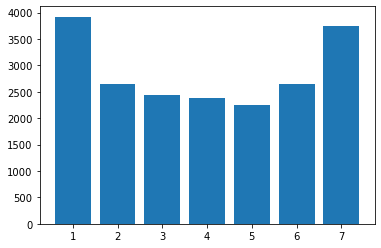

In [19]:
plt.bar(df_dow.index, df_dow['unique_id']);
# 1 Sun, 2 Mon etc

In [20]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

cat_race = df[['race']]
ohe.fit(cat_race)

# ohe.transform(cat_age).shape
race_encoded = pd.DataFrame(ohe.transform(cat_race).astype(int), columns=ohe.categories_[0])
race_encoded

,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
20031,0,0,1,0,0,0,0,0
20032,0,0,1,0,0,0,0,0
20033,0,0,1,0,0,0,0,0
20034,0,0,1,0,0,0,0,0


In [21]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

cat_age = df[['age']]
ohe.fit(cat_age)

# ohe.transform(cat_age).shape
age_encoded = pd.DataFrame(ohe.transform(cat_age).astype(int), columns=ohe.categories_[0])
age_encoded

,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN
0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
20031,0,1,0,0,0,0,0,0,0
20032,0,0,0,1,0,0,0,0,0
20033,0,0,0,1,0,0,0,0,0
20034,1,0,0,0,0,0,0,0,0


In [22]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

cat_sex = df[['sex']]
ohe.fit(cat_sex)

# ohe.transform(cat_age).shape
sex_encoded = pd.DataFrame(ohe.transform(cat_sex).astype(int), columns=ohe.categories_[0])
sex_encoded

,F,M,SEX_UNKNOWN
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
20031,0,1,0
20032,0,1,0
20033,0,1,0
20034,0,1,0


In [23]:
df = pd.concat([df, age_encoded, race_encoded, sex_encoded], axis=1)
df.tail()

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN
20031,JE266314,2021-06-14,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142),0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20032,JE289151,2021-07-03,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858),1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20033,JE290206,2021-07-04,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142),1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20034,JE292814,2021-07-06,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142),0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20035,JE277577,2021-06-24,2000 W 52ND ST,FATAL SHOOTING,HOM-JE277577-1,60609,16,NEW CITY,None,1,9,932,40 - 49,M,WWH,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,6,5,3,41.798852,-87.676535,POINT (-87.67653534612 41.798851654142),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [24]:
grouplist = [ 'date']

In [25]:
df_cases = df.groupby(grouplist, as_index=False).sum()

In [26]:
df_cases.rename(columns={'unique_id' : 'victim_count'})

,date,zip_code,ward,area,district,beat,month,day_of_week,hour,latitude,longitude,so_yes_no,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN
0,2016-01-01,1091286,283,36,167,17075,18,108,120,752.350287,-1577.764800,11,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0
1,2016-01-02,545728,209,29,100,10213,9,63,87,376.500046,-789.288924,8,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0
2,2016-01-03,727522,290,33,133,13586,12,12,77,502.281165,-1052.044919,8,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0
3,2016-01-04,363763,172,21,85,8669,6,12,92,251.120326,-526.252356,4,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0
4,2016-01-05,788118,217,32,116,11851,13,39,199,543.657052,-1139.761822,7,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2021-07-09,727460,248,27,99,10152,84,72,175,501.478864,-1051.766476,8,0,6,2,1,2,0,0,0,1,0,0,8,0,0,1,1,2,0,12,0
2012,2021-07-10,1576218,498,73,231,23691,182,182,320,1087.099022,-2279.510387,20,0,7,16,2,0,1,0,0,0,0,0,22,0,0,0,0,4,3,23,0
2013,2021-07-11,666851,136,24,66,6870,77,11,145,459.749293,-963.793031,8,0,5,3,2,1,0,0,0,0,0,0,8,0,0,0,0,3,0,11,0
2014,2021-07-12,606249,187,26,107,10922,70,20,128,418.001436,-876.618385,9,2,4,2,1,0,0,0,0,1,0,0,9,0,0,0,0,1,3,7,0


In [27]:
df_cases = df_cases[df_cases['date'] < '2020-01-01']
all_sex = ['M', 'F', 'SEX_UNKNOWN']
df_cases['total'] = df_cases[all_sex].sum(axis=1)
df_cases.head()

,date,zip_code,ward,area,district,beat,month,day_of_week,hour,latitude,longitude,so_yes_no,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,total
0,2016-01-01,1091286,283,36,167,17075,18,108,120,752.350287,-1577.764800,11,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0,18
1,2016-01-02,545728,209,29,100,10213,9,63,87,376.500046,-789.288924,8,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0,9
2,2016-01-03,727522,290,33,133,13586,12,12,77,502.281165,-1052.044919,8,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0,12
3,2016-01-04,363763,172,21,85,8669,6,12,92,251.120326,-526.252356,4,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0,6
4,2016-01-05,788118,217,32,116,11851,13,39,199,543.657052,-1139.761822,7,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0,13


In [28]:
drop_list = ['zip_code', 'ward', 'district', 'beat', 'month', \
         'day_of_week', 'hour', 'latitude', 'longitude', 'so_yes_no', 'area']

df_cases.drop(drop_list, axis=1, inplace=True)

In [29]:
df_cases

,date,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,total
0,2016-01-01,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0,18
1,2016-01-02,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0,9
2,2016-01-03,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0,12
3,2016-01-04,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0,6
4,2016-01-05,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2019-12-27,3,4,2,1,1,0,0,0,0,0,0,9,0,0,1,1,0,4,7,0,11
1454,2019-12-28,1,5,0,1,1,1,1,0,0,0,0,10,0,0,0,0,0,5,5,0,10
1455,2019-12-29,0,5,1,2,0,0,0,0,0,0,0,3,0,0,0,0,5,0,8,0,8
1456,2019-12-30,1,3,1,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,5,0,5


In [37]:
df_fsm = df_cases[['date', 'total']]
df_fsm.set_index('date', inplace=True)
df_fsm.head()

,total
date,
2016-01-01,18
2016-01-02,9
2016-01-03,12
2016-01-04,6
2016-01-05,13


In [40]:
df_fsm_roll_count = df_fsm['total'].rolling(min_periods=1, window=11).sum()
df_fsm = pd.concat([df_fsm_roll_count, df_fsm], axis=1)
df_fsm

,total,total
date,,
2016-01-01,18.0,18
2016-01-02,27.0,9
2016-01-03,39.0,12
2016-01-04,45.0,6
2016-01-05,58.0,13
...,...,...
2019-12-27,94.0,11
2019-12-28,100.0,10
2019-12-29,100.0,8


In [42]:
df_fsm.columns=['recent', 'total']

In [43]:
df_fsm

,recent,total
date,,
2016-01-01,18.0,18
2016-01-02,27.0,9
2016-01-03,39.0,12
2016-01-04,45.0,6
2016-01-05,58.0,13
...,...,...
2019-12-27,94.0,11
2019-12-28,100.0,10
2019-12-29,100.0,8


In [44]:
df_fsm[7:]

,recent,total
date,,
2016-01-08,97.0,18
2016-01-09,108.0,11
2016-01-10,120.0,12
2016-01-11,126.0,6
2016-01-12,119.0,11
...,...,...
2019-12-27,94.0,11
2019-12-28,100.0,10
2019-12-29,100.0,8


<AxesSubplot:xlabel='date'>

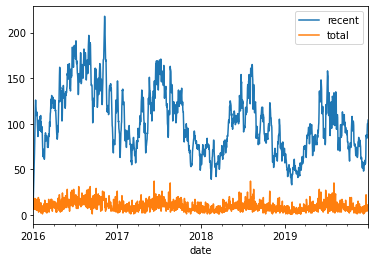

In [46]:
df_fsm.plot()

In [50]:
first_simple_model = LinearRegression()

X = df_fsm.drop('total', axis=1)
y = df_fsm['total']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=42)

first_simple_model.fit(X_train, y_train)

LinearRegression()

In [52]:
first_simple_model.score(X_train, y_train)

0.27704796933666587

In [53]:
first_simple_model.score(X_test, y_test)

0.2995437678008872